Assumptions:

Data was entered accurately

    I cant check and change every cell on a large data set, so I won't do that here for the genres category
    
    However I will browse through the aritsts to see if I like how they have been entered
   
       IF an artist is not how I would like it to be, I will change it
       
       ELSE the artist name will not change


Hypothesis: The Grammy's effect when tracks reach their peak

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
%matplotlib inline

def t_sec(x):
    x=str(x)
    m=x[0]
    s=x[1:3]
    m=int(m)
    s=int(s)
    t=m*60+s
    return t

df=pd.read_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-02/assets/billboard.csv")
name=range(1,77)
names=["week_"+str(x) for x in name]

#Renaming columns; made easier by using range function and concatenation
df.columns=['year','artist','track_name','track_time','genre','date_entered','date_peaked','week_1', 'week_2', \
            'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12',\
            'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', \
            'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', \
            'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', \
            'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', \
            'week_49', 'week_50', 'week_51', 'week_52', 'week_53', 'week_54', 'week_55', 'week_56', 'week_57', \
            'week_58', 'week_59', 'week_60', 'week_61', 'week_62', 'week_63', 'week_64', 'week_65', 'week_66', \
            'week_67', 'week_68', 'week_69', 'week_70', 'week_71', 'week_72', 'week_73', 'week_74', 'week_75', \
            'week_76']

#Change time to seconds
df["track_time"]=df["track_time"].apply(lambda x: t_sec(int(x[0:7].replace(',',''))))

#Change Genre Names
df['genre'].replace('R & B','R&B', inplace=True)
df['genre'].replace("Rock'n'roll","Rock",inplace=True)

#Datetime
df['date_entered']=pd.to_datetime(df['date_entered'])
df['date_peaked']=pd.to_datetime(df['date_peaked'])

#Artist Names
df["artist"].replace("Janet","Janet Jackson",inplace=True)
df["artist"].replace("2Ge+her","2Gether",inplace=True)
df["artist"].replace("matchbox twenty","Matchbox Twenty",inplace=True)

#Take * and replace with NaN
df.replace('*',np.nan,inplace=True)
#New column for days between date_entered and date_peaked
df["days_until_peak"]= [int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j")) if  \
       int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j"))>=0 else \
       int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j"))+365 \
                    for x,y in zip(df['date_peaked']\
                                   , df['date_entered'])]
#look up how to convert date to how many days have past in year
#might have to set date to %m-%d and create dictionary with month values and compute manually from there

#Rearranging columns and finding lowest rank acheived
cols=df.columns.tolist()
cols.insert(7,cols[-1:][0])
cols=cols[:-1]
df=df[cols]

cols=df.columns.tolist()
cols=cols[8:]

low_list=[]
i=0

while i<317:
    low=[]
    for col in cols:
        low.append(df.loc[i,col])
    low_list.append(low)
    i+=1

i=0
j=0

while j<len(low_list):
    i=0
    while i<len(low_list[j]):
        if type(low_list[j][i])==str:
            low_list[j][i]=int(low_list[j][i])
        i+=1
    j+=1
#Finds lowest rank achieved
lowest_rank = [min (x) for x in low_list]
#Counts number of time lowest rank occurs
lowest_rank_count = [x.count(y) for x,y in zip(low_list,lowest_rank)]
#Counts total weeks in rankings
total_weeks=[]
for x in low_list:
    i=0
    for y in x:
        if np.isnan(y):
            pass
        else:
            i+=1

    total_weeks.append(i)

#Put new lists in to df
temp_df1=pd.DataFrame(lowest_rank,columns=['lowest_rank'])
temp_df2=pd.DataFrame(lowest_rank_count,columns=['lowest_rank_count'])
temp_df3=pd.DataFrame(total_weeks,columns=['total_weeks'])
df=pd.concat([df,temp_df1,temp_df2,temp_df3],axis=1)
cols=df.columns.tolist()
cols.insert(8,cols[-3:][0])
cols.insert(9,cols[-2:][0])
cols.insert(10,cols[-1:][0])
cols=cols[:-3]
df=df[cols]

#The month of the date peaked
df['date_peaked']=pd.to_datetime(df['date_peaked'])
month_peaked=[x.month for x in df['date_peaked']]
temp_df=pd.DataFrame(month_peaked,columns=['month_peaked'])
df=pd.concat([df,temp_df],axis=1)
cols=df.columns.tolist()
cols.insert(7,cols[-1:][0])
cols=cols[:-1]
df=df[cols]

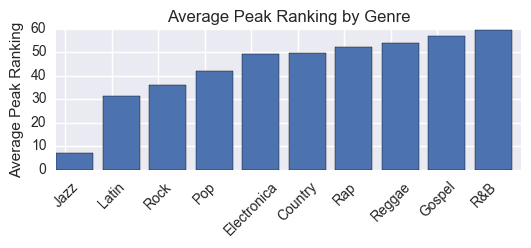

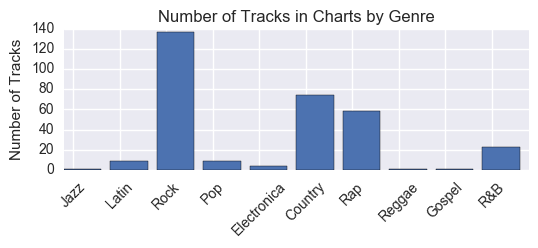

In [3]:
genres=['Rock', 'Latin', 'Country', 'Rap', 'Pop', 'Electronica', 'Jazz', 'R&B', 'Reggae', 'Gospel']
avg_ranks=[(x,df[df['genre']==x]['lowest_rank'].mean(),df[df['genre']==x]['lowest_rank'].count()) for x in genres]
avg_ranks.sort(key=lambda x: x[1])
genres=[x[0] for x in avg_ranks]
average=[x[1] for x in avg_ranks]
tracks=[x[2] for x in avg_ranks]
plt.subplot(211)
plt.bar(range(10),average)
plt.xticks(np.linspace(0.2,9.2,10),genres,rotation=45)
plt.ylabel("Average Peak Ranking")
plt.title("Average Peak Ranking by Genre")
plt.show()
plt.subplot(212)
plt.bar(range(10),tracks)
plt.xticks(np.linspace(0.2,9.2,10),genres,rotation=45)
plt.title("Number of Tracks in Charts by Genre")
plt.ylabel("Number of Tracks")
plt.show()

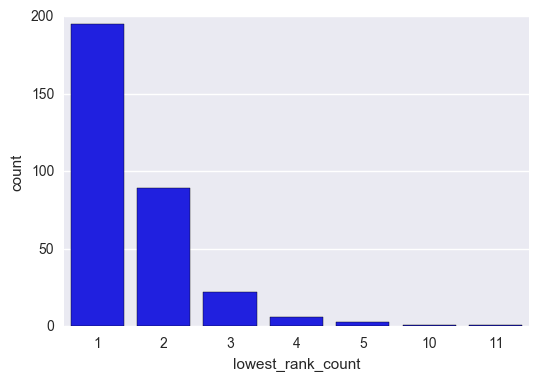

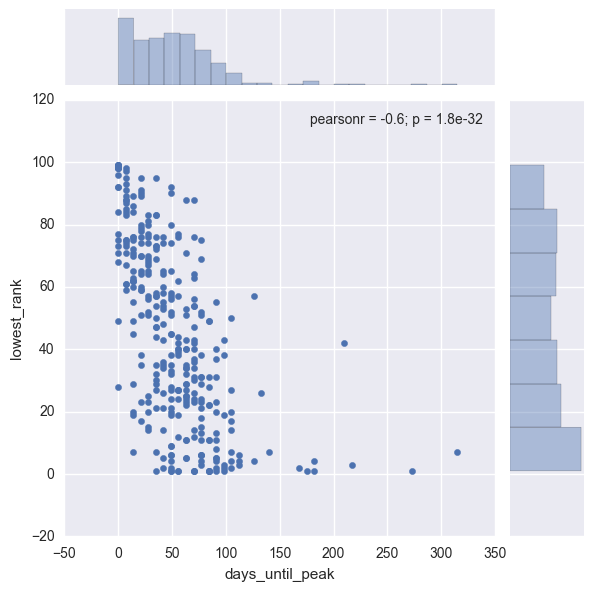

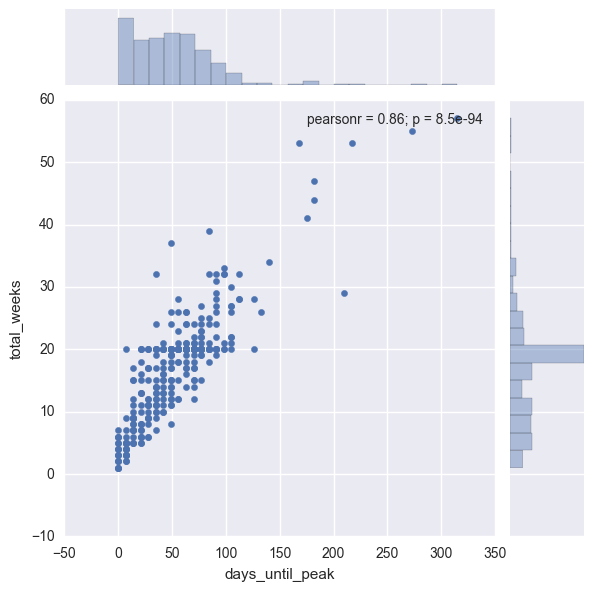

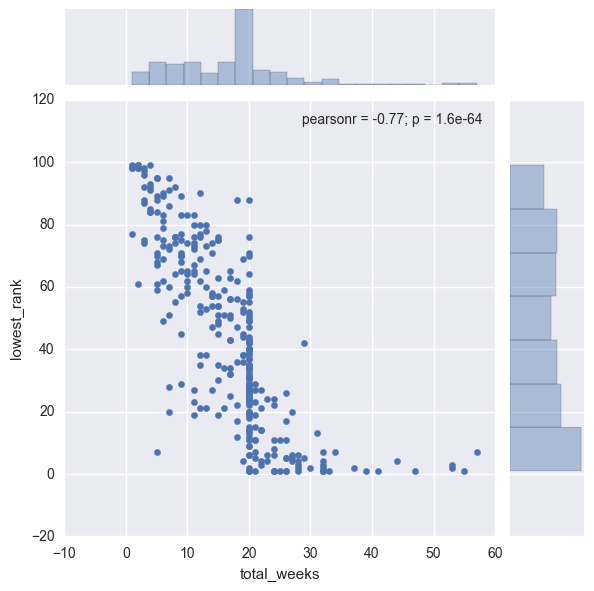

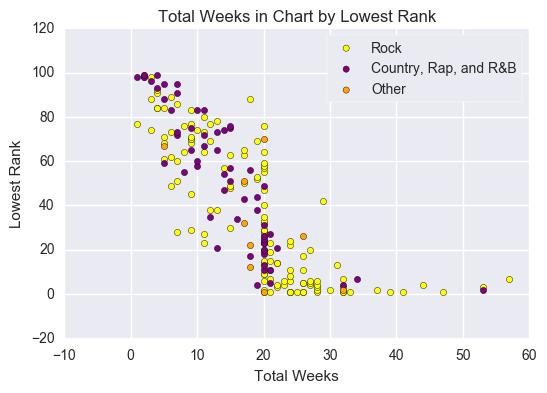

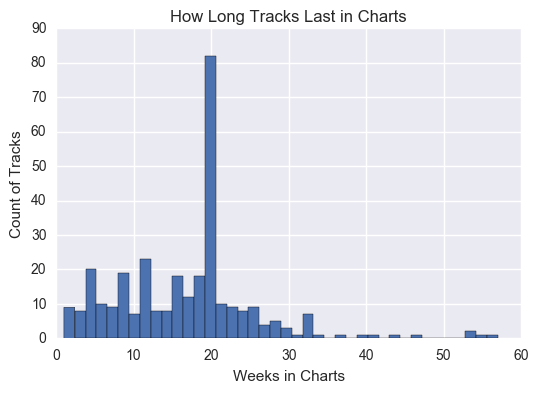

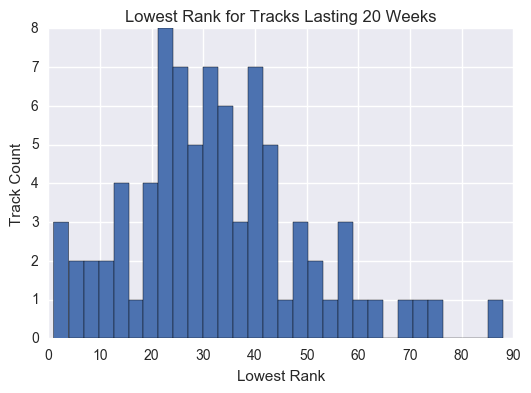

In [2]:
x='orange'
c_dic1={'Rock':'yellow','Country':'purple','Rap':'purple','R&B':'purple','Pop':x,'Latin':x,\
       'Electronica':x,'Gospel':x,'Jazz':x,'Reggae':x}
c_dic2={'Rock':'pink','Country':'red','Rap':'purple','R&B':'yellow','Pop':'blue','Latin':x,\
       'Electronica':x,'Gospel':x,'Jazz':x,'Reggae':x}
colors1=[c_dic1[x] for x in df['genre']]
colors2=[c_dic2[x] for x in df['genre']]

sns.countplot(df["lowest_rank_count"],color='b')
sns.jointplot("days_until_peak","lowest_rank",data=df)
sns.jointplot("days_until_peak","total_weeks",data=df)
sns.jointplot("total_weeks","lowest_rank",data=df,cmap=colors1)
plt.show()
plt.scatter(df[df['genre']=='Rock']["total_weeks"],df[df['genre']=='Rock']["lowest_rank"],c='yellow',label='Rock')
plt.scatter(df[df['genre']==('Rap'or'Country'or'R&B')]["total_weeks"],df[df['genre']==('Rap'or'Country'or'R&B')]\
            ["lowest_rank"],c='purple',label="Country, Rap, and R&B")
plt.scatter(df[df['genre']==('Latin'or'Pop'or'Electronica'or'Jazz'or'Reggae'or'Gospel')]\
            ["total_weeks"],df[df['genre']==('Latin'or'Pop'or'Electronica'or'Jazz'or'Reggae'or'Gospel')]\
            ["lowest_rank"],c='orange',label="Other")
plt.xlabel("Total Weeks")
plt.ylabel("Lowest Rank")
plt.title("Total Weeks in Chart by Lowest Rank")
plt.legend(loc='upper right',frameon=True)
plt.show()
plt.hist(df["total_weeks"],bins=40)
plt.title("How Long Tracks Last in Charts")
plt.ylabel("Count of Tracks")
plt.xlabel("Weeks in Charts")
plt.show()
plt.hist(df[df["total_weeks"]==20]["lowest_rank"],bins=30)
plt.title("Lowest Rank for Tracks Lasting 20 Weeks")
plt.ylabel("Track Count")
plt.xlabel("Lowest Rank")
plt.show()

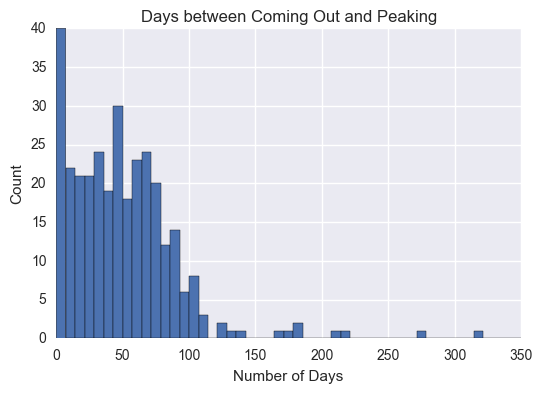

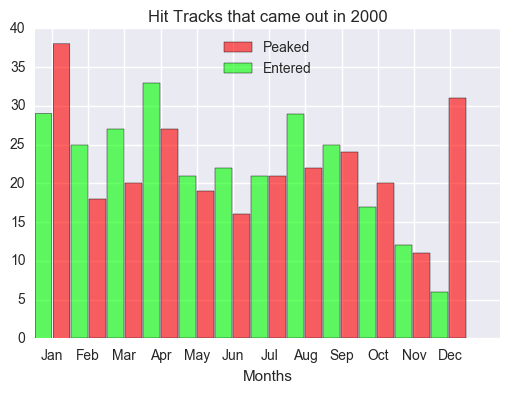

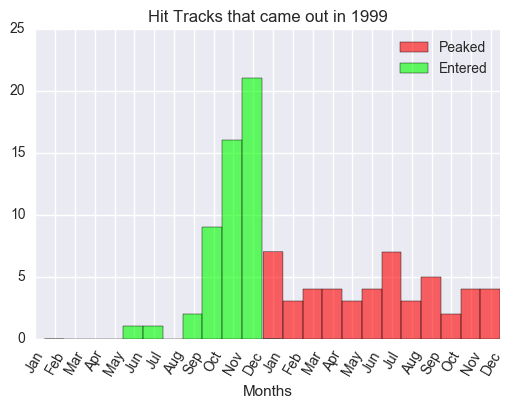

In [4]:
#plt.bar(df['date_peaked'].unique(),df['date_peaked'].value_counts())
#plt.show()
plt.hist(df['days_until_peak'],np.linspace(0,350,50))
plt.title("Days between Coming Out and Peaking")
plt.xlabel("Number of Days")
plt.ylabel("Count")
plt.show()

month_peak2000=np.array([datetime.strftime(x,"%-m") for x,y in zip(df['date_peaked'],\
                [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000])]).astype(int)
start2000=np.array([datetime.strftime(x,'%-m') for x in \
               [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000]\
               ]).astype(int)

plt.hist(month_peak2000,np.linspace(0,13,13),color=(1,0,0,.6),label="Peaked",width=0.5,align='right')
plt.hist(start2000,np.linspace(0,13,13),color=(0,1,0,.6),label="Entered",width=0.5)
plt.xticks(np.linspace(.5,12.5,12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Months")
plt.title("Hit Tracks that came out in 2000")
plt.legend(loc=9)
plt.show()


month_peak1999=np.array([datetime.strftime(x,"%-m") for x,y in zip(df['date_peaked'],\
                [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 1999])]).astype(int)
start1999=np.array([datetime.strftime(x,'%-m') for x in \
               [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 1999]\
               ]).astype(int)

plt.hist(month_peak1999+12,np.linspace(12,25,13),color=(1,0,0,.6),label="Peaked")
plt.hist(start1999-1,np.linspace(0,13,13),color=(0,1,0,.6),label="Entered")
plt.xticks(np.linspace(-0.5,24.5,24),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",\
                                     "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],\
           rotation=60)
plt.xlabel("Months")
plt.title("Hit Tracks that came out in 1999")
plt.legend(loc='upper right')
plt.show()

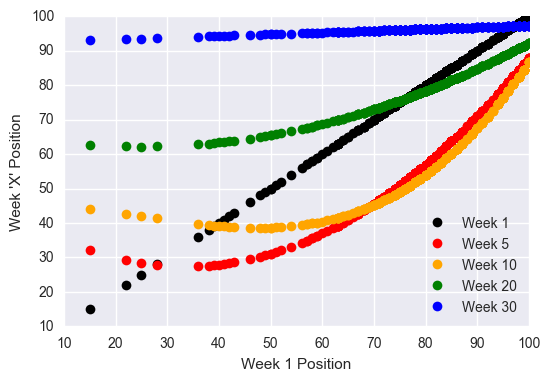

In [5]:
df.replace(np.nan,101,inplace=True)
fit1=np.polyfit(df['week_1'],df['week_1'].astype(np.int),3)
fit_fn1=np.poly1d(fit1)
fit5=np.polyfit(df['week_1'],df['week_5'].astype(np.int),2)
fit_fn5=np.poly1d(fit5)
fit10=np.polyfit(df['week_1'],df['week_10'].astype(np.int),3)
fit_fn10=np.poly1d(fit10)
fit20=np.polyfit(df['week_1'],df['week_20'].astype(np.int),2)
fit_fn20=np.poly1d(fit20)
fit30=np.polyfit(df['week_1'],df['week_30'].astype(np.int),1)
fit_fn30=np.poly1d(fit30)
plt.plot(df['week_1'],fit_fn1(df['week_1']),'o',color='black',label='Week 1')
plt.plot(df['week_1'],fit_fn5(df['week_1'].astype(np.int)),'o',color='red',label='Week 5')
plt.plot(df['week_1'],fit_fn10(df['week_1'].astype(np.int)),'o',color='orange',label='Week 10')
plt.plot(df['week_1'],fit_fn20(df['week_1'].astype(np.int)),'o',color='green',label='Week 20')
plt.plot(df['week_1'],fit_fn30(df['week_1'].astype(np.int)),'o',color='blue',label='Week 30')
plt.xlabel('Week 1 Position')
plt.ylabel('Week \'X\' Position')
plt.legend(loc="lower right")
plt.show()
df.replace(101,np.nan,inplace=True)

['Rock' 'Latin' 'Country' 'Rap' 'Pop' 'Electronica' 'Jazz' 'R&B' 'Reggae'
 'Gospel']


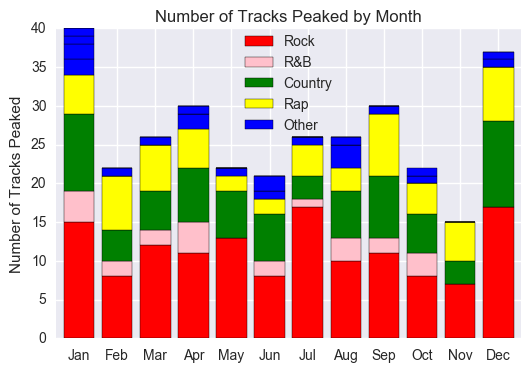

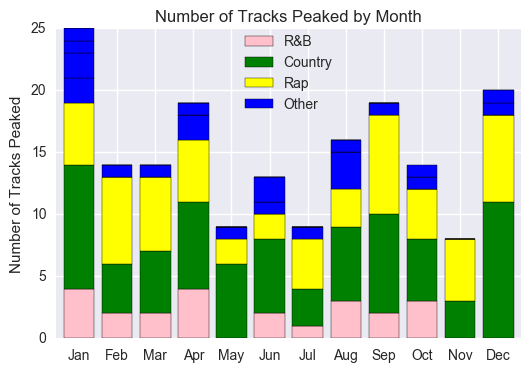

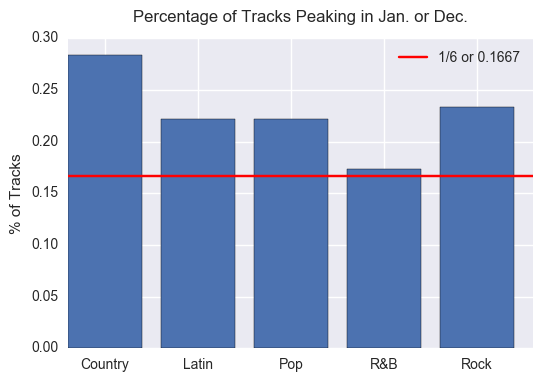

In [6]:
df_temp=pd.melt(df,id_vars="month_peaked",value_vars=['genre'])
df_temp
cols=df['genre'].unique()
l=[]
for x in cols:
    l.append([x[0] for x in df_temp[df_temp['value']==x].values.tolist()])
g=[]
c=0
h={}
for i in l:
    g=[]
    for x in range(1,13):
        count=i.count(x)
        a= x
        b= count
        g.append(b)
    h[cols[c]]=g
    c+=1
        
dfh=pd.DataFrame(h)
x='blue'
print cols
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[0]],label=cols[0],color='red')
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[7]],color='pink',label="R&B",\
      bottom=dfh[cols[0]])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[2]],label=cols[2],color='green',\
      bottom=[a+b for a,b in zip(dfh[cols[0]],dfh[cols[7]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[3]],label=cols[3],color='yellow',\
      bottom=[a+b+c for a,b,c in zip(dfh[cols[0]],dfh[cols[7]],dfh[cols[2]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[4]],label="Other",color=x,\
      bottom=[a+b+c+d for a,b,c,d in zip(dfh[cols[0]],dfh[cols[7]],dfh[cols[2]],dfh[cols[3]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[5]],color=x,\
      bottom=[a+b+c+d+e for a,b,c,d,e in zip(dfh[cols[0]],dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],dfh[cols[4]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[6]],color=x,\
      bottom=[a+b+c+d+e+f for a,b,c,d,e,f in zip(dfh[cols[0]],dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],\
                                                dfh[cols[4]],dfh[cols[5]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[1]],color=x,\
      bottom=[a+b+c+d+e+f+g for a,b,c,d,e,f,g in zip(dfh[cols[0]],dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],\
                                                        dfh[cols[4]],dfh[cols[5]],dfh[cols[6]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[8]],color=x,\
      bottom=[a+b+c+d+e+f+g+h for a,b,c,d,e,f,g,h in zip(dfh[cols[0]],dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],\
                                                        dfh[cols[4]],dfh[cols[5]],dfh[cols[6]],dfh[cols[1]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[9]],color=x,\
      bottom=[a+b+c+d+e+f+g+h+i for a,b,c,d,e,f,g,h,i in zip(dfh[cols[0]],dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],\
                                                            dfh[cols[4]],dfh[cols[5]],dfh[cols[6]],dfh[cols[1]],\
                                                            dfh[cols[8]])])
plt.legend(loc="upper center",bbox_to_anchor=(.5,1.02))
plt.xticks(range(12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlim(-.6,11.6)
plt.ylabel("Number of Tracks Peaked")
plt.title("Number of Tracks Peaked by Month")
plt.show()

plt.bar(np.linspace(-.4,10.6,12),dfh[cols[7]],color='pink',label="R&B")


plt.bar(np.linspace(-.4,10.6,12),dfh[cols[2]],label=cols[2],color='green',\
      bottom=dfh[cols[7]])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[3]],label=cols[3],color='yellow',\
      bottom=[a+b for a,b in zip(dfh[cols[7]],dfh[cols[2]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[4]],label="Other",color=x,\
      bottom=[a+b+c for a,b,c in zip(dfh[cols[7]],dfh[cols[2]],dfh[cols[3]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[5]],color=x,\
      bottom=[a+b+c+d for a,b,c,d in zip(dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],dfh[cols[4]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[6]],color=x,\
      bottom=[a+b+c+d+e for a,b,c,d,e in zip(dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],\
                                                dfh[cols[4]],dfh[cols[5]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[1]],color=x,\
      bottom=[a+b+c+d+e+f for a,b,c,d,e,f in zip(dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],\
                                                        dfh[cols[4]],dfh[cols[5]],dfh[cols[6]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[8]],color=x,\
      bottom=[a+b+c+d+e+f+g for a,b,c,d,e,f,g in zip(dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],\
                                                        dfh[cols[4]],dfh[cols[5]],dfh[cols[6]],dfh[cols[1]])])
plt.bar(np.linspace(-.4,10.6,12),dfh[cols[9]],color=x,\
      bottom=[a+b+c+d+e+f+g+h for a,b,c,d,e,f,g,h in zip(dfh[cols[7]],dfh[cols[2]],dfh[cols[3]],\
                                                            dfh[cols[4]],dfh[cols[5]],dfh[cols[6]],dfh[cols[1]],\
                                                            dfh[cols[8]])])
plt.legend(loc="upper center",bbox_to_anchor=(.5,1.02))
plt.xticks(range(12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlim(-.6,11.6)
plt.ylabel("Number of Tracks Peaked")
plt.title("Number of Tracks Peaked by Month")
plt.show()

# % of tracks peaking in Jan and Dec by genre
l=dfh.iloc[[0,11],:]
l_sum=[sum(dfh[x]) for x in dfh]
l_jd=[sum(l[x]) for x in l]
l_perc=zip(dfh.columns,[x/float(y) for x,y in zip(l_jd,l_sum)])
l_perc=[l_perc[0],l_perc[4],l_perc[5],l_perc[6],l_perc[9]]
l_perc
plt.bar(range(5),[x[1] for x in l_perc])
plt.axhline(1/6.,c='red',label="1/6 or 0.1667")
plt.xticks(np.linspace(0.4,4.4,5),[x[0] for x in l_perc])
plt.ylabel("% of Tracks")
plt.title("Percentage of Tracks Peaking in Jan. or Dec.",y=1.03)
plt.legend(loc='upper right')
plt.show()

In [ ]:
pd.set_option('display.max_rows', 80)